In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
data = load_breast_cancer()

data.keys()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=34)

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,y_train)

y_pred = knnmodel.predict(X_test)

print("accuracy - >", accuracy_score(y_test, y_pred))
print("Precision - >", precision_score(y_test, y_pred))
print("Recall - >", recall_score(y_test, y_pred))

accuracy - > 0.9440559440559441
Precision - > 0.9387755102040817
Recall - > 0.9787234042553191


<Axes: >

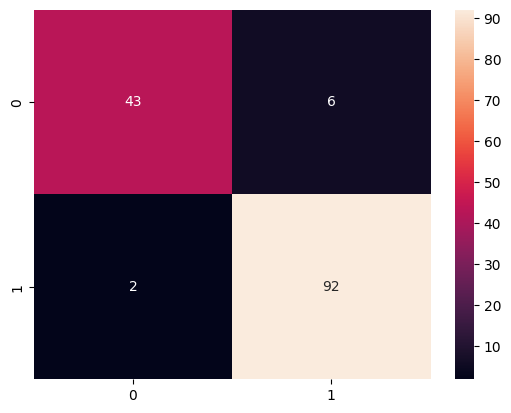

In [6]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [10]:
classifier = KNeighborsClassifier()

params = {
    'n_neighbors' :  [5,7,9,11,13,15,17,19],
    'metric' : ['minkowski','euclidean','manhattan']
}

get_best_rs = RandomizedSearchCV(estimator=classifier, param_distributions=params, verbose=True,cv = 3, n_jobs=-1)
get_best_gs = GridSearchCV(estimator=classifier, param_grid=params, verbose=True, cv = 3, n_jobs=-1)

In [11]:
get_best_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19]},
                   verbose=True)

In [12]:
get_best_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=True)

In [15]:
get_best_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [16]:
get_best_rs.best_params_

{'n_neighbors': 9, 'metric': 'minkowski'}

In [17]:
best_model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=5)
best_model2 = KNeighborsClassifier(metric='minkowski', n_neighbors=9)

best_model1.fit(X_train,y_train)
best_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

<Axes: >

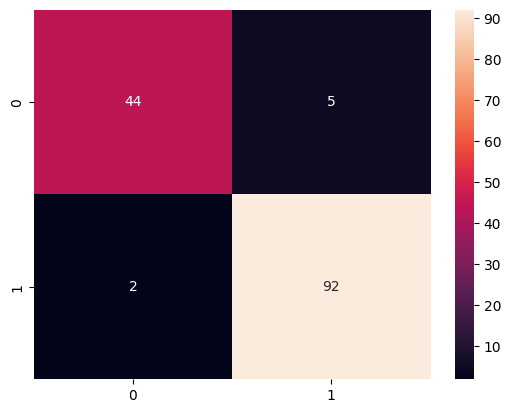

In [18]:
sns.heatmap(confusion_matrix(y_test, best_model1.predict(X_test)), annot=True)

<Axes: >

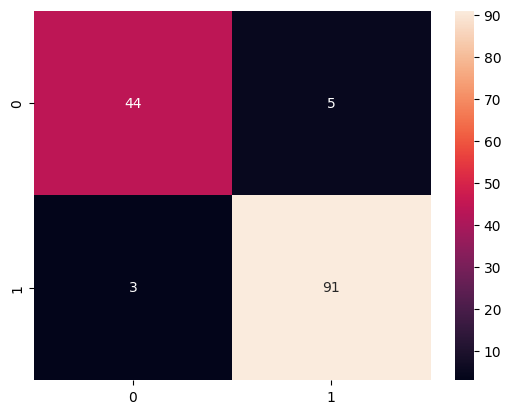

In [19]:
sns.heatmap(confusion_matrix(y_test, best_model2.predict(X_test)), annot=True)